In [85]:
# These are boiler plate imports that seem useful
# Perhaps cleaner would be to delete or comment out the ones that aren't used in this script...

import sys
import json
import csv
import yaml

import os
from dotenv import load_dotenv

import pandas as pd
import numpy as np
import math

import matplotlib as mpl
import matplotlib.pyplot as plt

import itertools

import time
from datetime import datetime
# see https://stackoverflow.com/questions/415511/how-do-i-get-the-current-time-in-python
#   for some basics about datetime

import pprint

# sqlalchemy 2.0 documentation: https://www.sqlalchemy.org/
import psycopg2
from sqlalchemy import create_engine, text as sql_text

# the following is deprecated, it seems, so using the sqlalchemy
# from pyscopg2 import sqlio

# the file in benchmarking/util.py should hold utilities useful for your benchmarking exercise
# In this notebook we have commented out all mentions of util, so that you can run
#    this notebook before setting up your benchmarking/util.py file
sys.path.append('benchmarking/')
import util
# to invoke a function "foo()" inside util.py, use "util.foo()"

# listings_join_reviews.json

In [86]:
# load data
data_listings = util.fetch_perf_data('listings_join_reviews.json')

In [87]:
def rename_keys(d):
    return {k.split('_')[-1] : v for k, v in d.items()}

In [88]:
renamed_data_listings = rename_keys(data_listings)

In [89]:
def extract_value(data, val):
    values = {}
    for year, details in data.items():
        values[year] = {}
        for key, metrics in details.items():
            if val in metrics:
                values[year][key] = metrics[val]
    return values

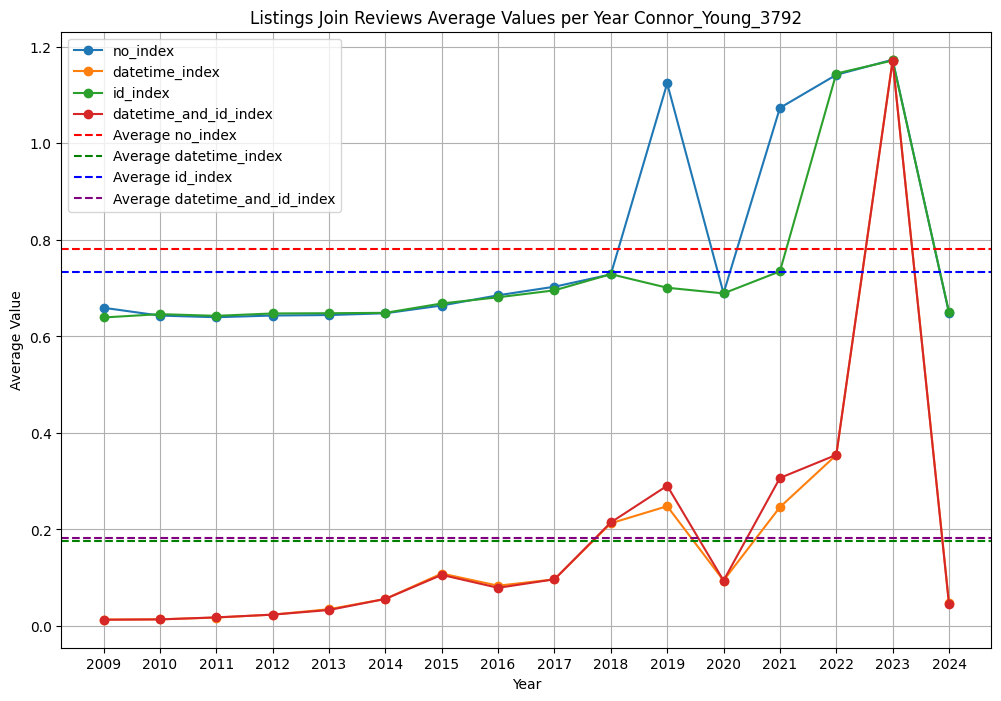

In [90]:
listings_avg_values = extract_value(renamed_data_listings, 'avg')
listings_avg_df = pd.DataFrame(listings_avg_values).T
listings_avg_df.rename(columns = {"__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__id_in_listings__": "id_index",
    "__id_in_listings__datetime_in_reviews__": "datetime_and_id_index"}
    , inplace = True)

plt.figure(figsize=(12, 8))

# plot each index data
for col in listings_avg_df.columns:
    plt.plot(listings_avg_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

# calcualte and plot average lines for ech index across all years
for i, col in enumerate(listings_avg_df.columns):
    avg = listings_avg_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Listings Join Reviews Average Values per Year Connor_Young_3792')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

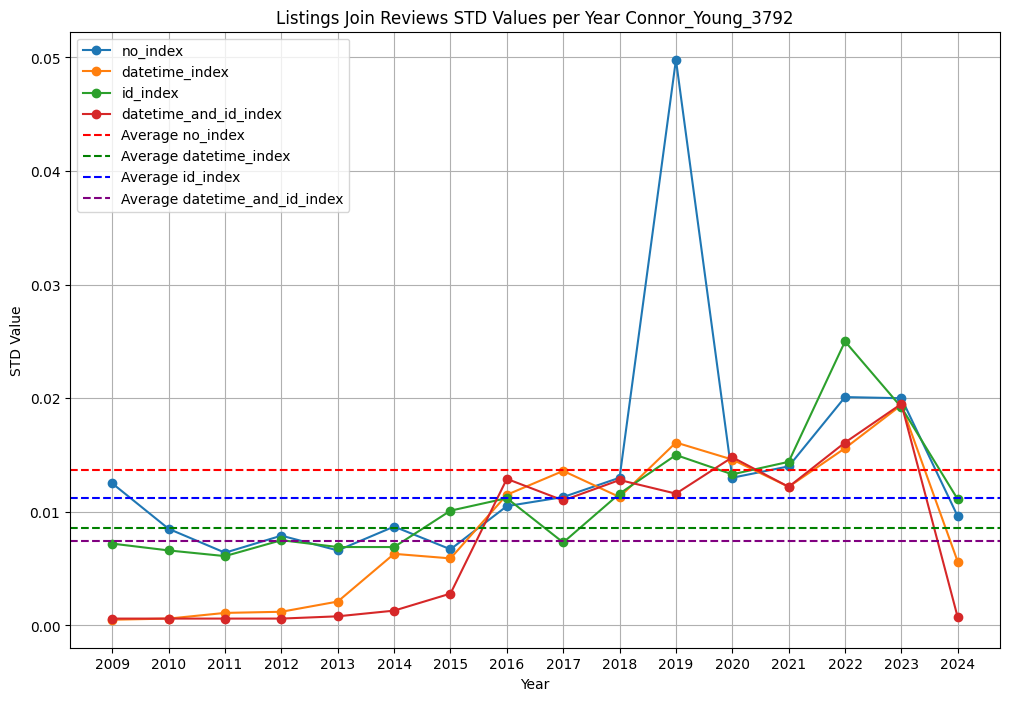

In [91]:
listings_std_values = extract_value(renamed_data_listings, 'std')
listings_std_df = pd.DataFrame(listings_std_values).T
listings_std_df.rename(columns = {"__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__id_in_listings__": "id_index",
    "__id_in_listings__datetime_in_reviews__": "datetime_and_id_index"}
    , inplace = True)

plt.figure(figsize=(12, 8))

# plot each index data
for col in listings_std_df.columns:
    plt.plot(listings_std_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

# calcualte and plot average lines for ech index across all years
for i, col in enumerate(listings_std_df.columns):
    avg = listings_std_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Listings Join Reviews STD Values per Year Connor_Young_3792')
plt.xlabel('Year')
plt.ylabel('STD Value')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# text_search_query.json

In [92]:
data_text_search = util.fetch_perf_data('text_search_query.json')

In [93]:
def text_search_extract_value(data, word, value):
    values = {}
    for key, details in data.items():
        wd, year = key.split('_')
        if wd == word:
            values[year] = {}
            for k, metrics in details.items():
                if value in metrics:
                    values[year][k] = metrics[value]
    return values


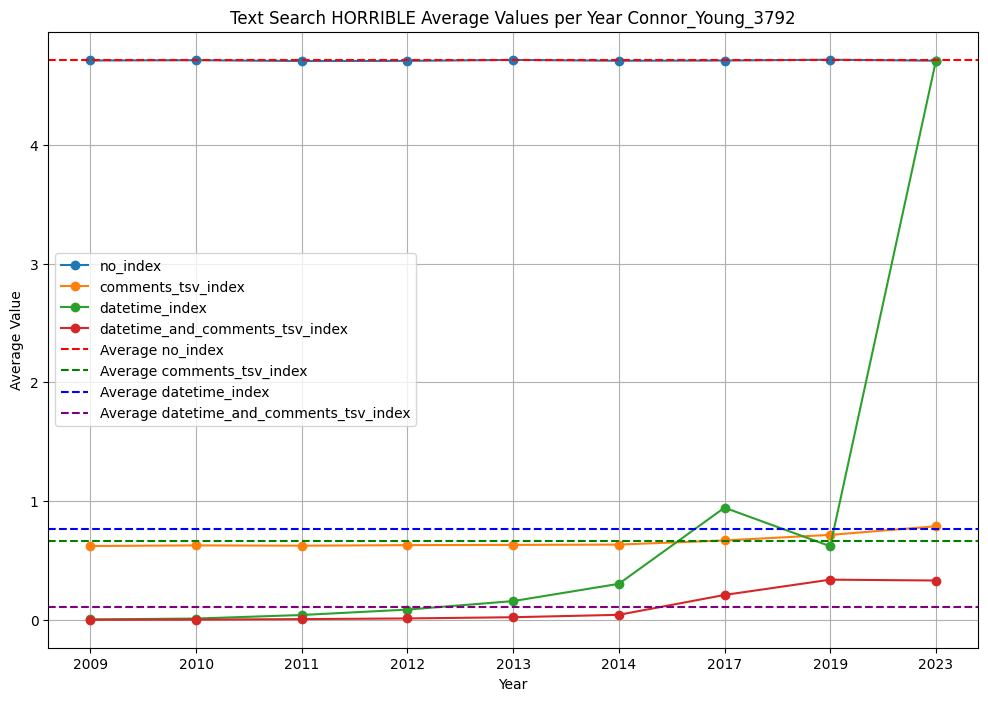

In [94]:
horrible_avg_values = text_search_extract_value(data_text_search, 'horrible', 'avg')
horrible_avg_df = pd.DataFrame(horrible_avg_values).T
horrible_avg_df.rename(columns = {"__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__comments_tsv_in_reviews__": "comments_tsv_index",
    "__datetime_in_reviews__comments_tsv_in_reviews__": "datetime_and_comments_tsv_index"}
    , inplace = True)

plt.figure(figsize=(12, 8))

# plot each index data
for col in horrible_avg_df.columns:
    plt.plot(horrible_avg_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

# calcualte and plot average lines for ech index across all years
for i, col in enumerate(horrible_avg_df.columns):
    avg = horrible_avg_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Text Search HORRIBLE Average Values per Year Connor_Young_3792')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

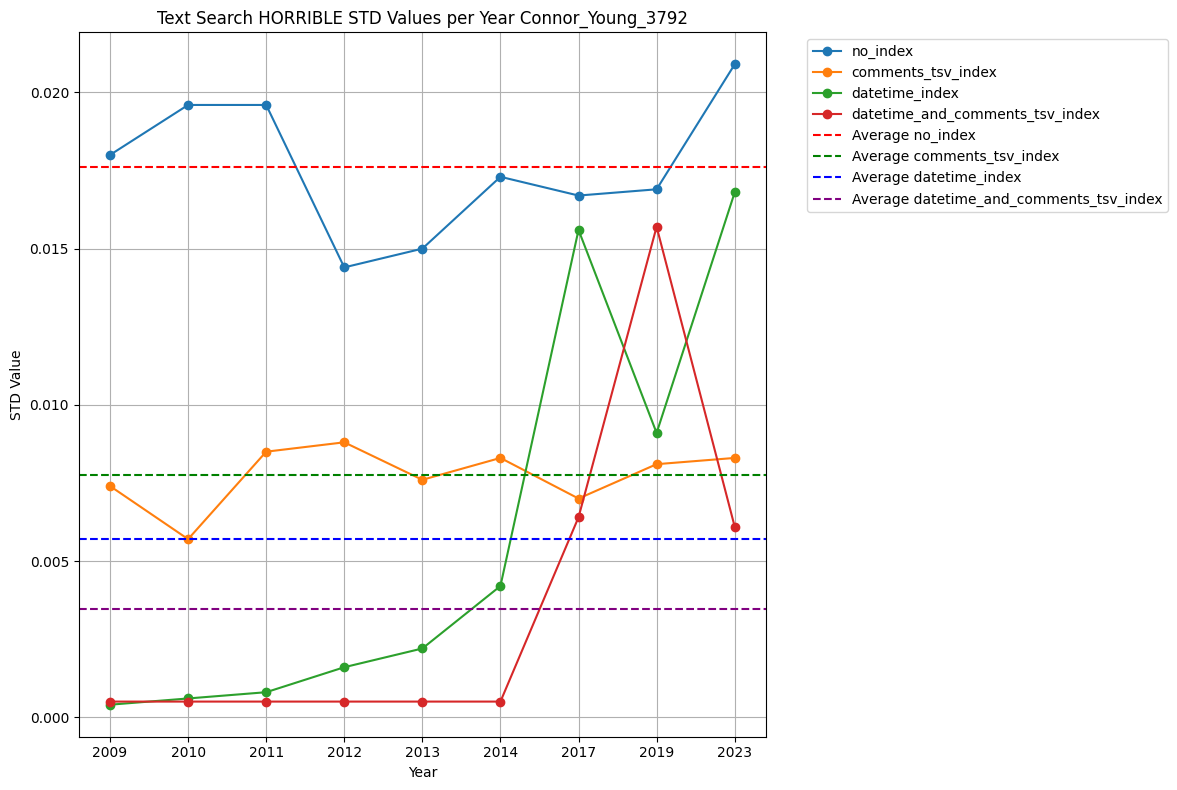

In [95]:
horrible_std_values = text_search_extract_value(data_text_search, 'horrible', 'std')
horrible_std_df = pd.DataFrame(horrible_std_values).T
horrible_std_df.rename(columns = {"__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__comments_tsv_in_reviews__": "comments_tsv_index",
    "__datetime_in_reviews__comments_tsv_in_reviews__": "datetime_and_comments_tsv_index"}
    , inplace = True)

plt.figure(figsize=(12, 8))

# plot each index data
for col in horrible_std_df.columns:
    plt.plot(horrible_std_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

# calcualte and plot average lines for ech index across all years
for i, col in enumerate(horrible_std_df.columns):
    avg = horrible_std_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Text Search HORRIBLE STD Values per Year Connor_Young_3792')
plt.xlabel('Year')
plt.ylabel('STD Value')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

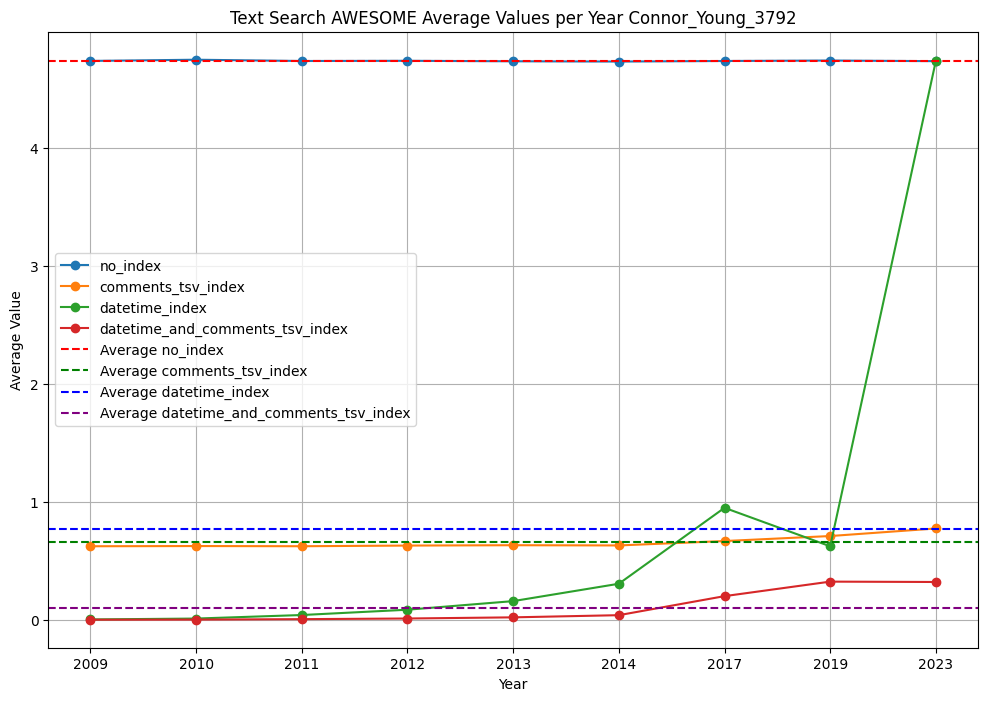

In [96]:
awesome_avg_values = text_search_extract_value(data_text_search, 'awesome', 'avg')
awesome_avg_df = pd.DataFrame(awesome_avg_values).T
awesome_avg_df.rename(columns = {"__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__comments_tsv_in_reviews__": "comments_tsv_index",
    "__datetime_in_reviews__comments_tsv_in_reviews__": "datetime_and_comments_tsv_index"}
    , inplace = True)

plt.figure(figsize=(12, 8))

# plot each index data
for col in awesome_avg_df.columns:
    plt.plot(awesome_avg_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

# calcualte and plot average lines for ech index across all years
for i, col in enumerate(awesome_avg_df.columns):
    avg = awesome_avg_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Text Search AWESOME Average Values per Year Connor_Young_3792')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

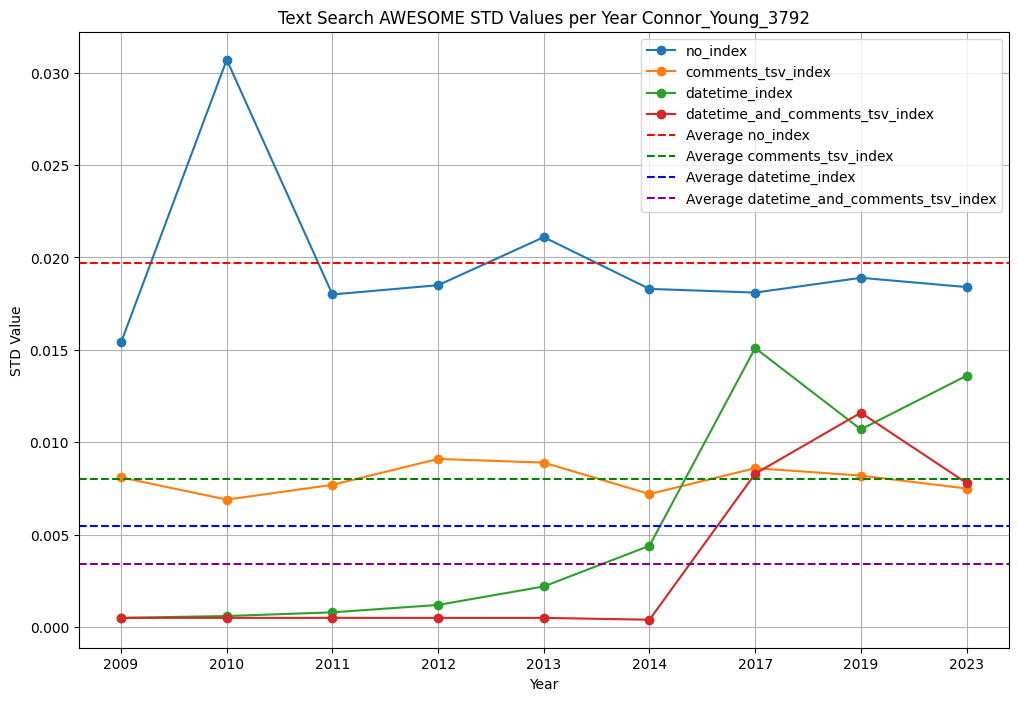

In [97]:
awesome_std_values = text_search_extract_value(data_text_search, 'awesome', 'std')
awesome_std_df = pd.DataFrame(awesome_std_values).T
awesome_std_df.rename(columns = {"__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__comments_tsv_in_reviews__": "comments_tsv_index",
    "__datetime_in_reviews__comments_tsv_in_reviews__": "datetime_and_comments_tsv_index"}
    , inplace = True)

plt.figure(figsize=(12, 8))

# plot each index data
for col in awesome_std_df.columns:
    plt.plot(awesome_std_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

# calcualte and plot average lines for ech index across all years
for i, col in enumerate(awesome_std_df.columns):
    avg = awesome_std_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Text Search AWESOME STD Values per Year Connor_Young_3792')
plt.xlabel('Year')
plt.ylabel('STD Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

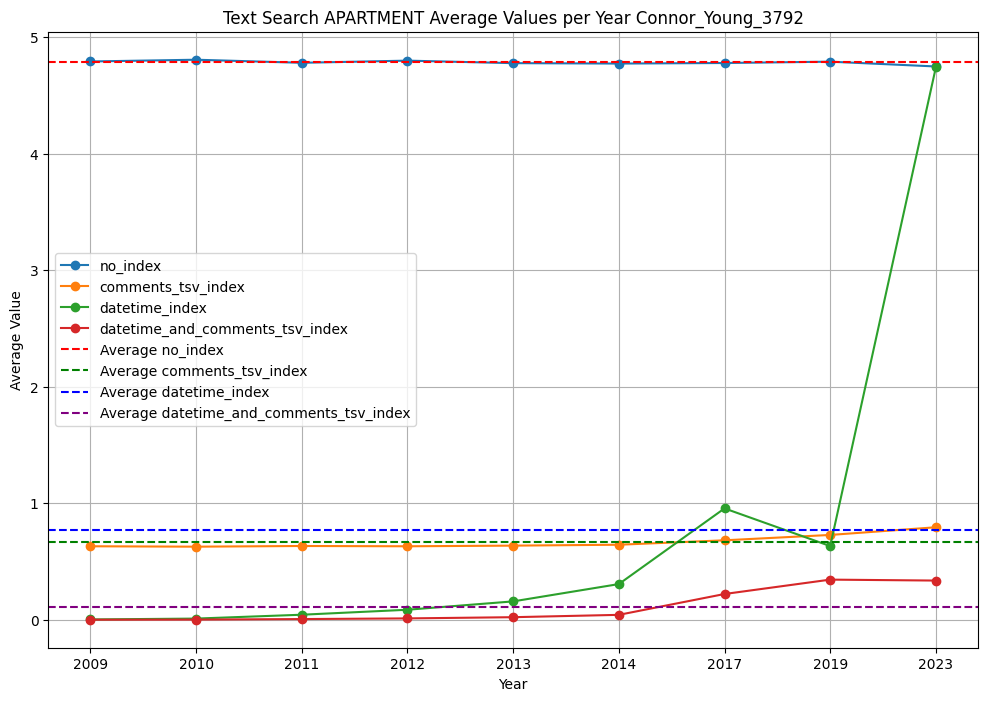

In [98]:
apartment_avg_values = text_search_extract_value(data_text_search, 'apartment', 'avg')
apartment_avg_df = pd.DataFrame(apartment_avg_values).T
apartment_avg_df.rename(columns = {"__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__comments_tsv_in_reviews__": "comments_tsv_index",
    "__datetime_in_reviews__comments_tsv_in_reviews__": "datetime_and_comments_tsv_index"}
    , inplace = True)

plt.figure(figsize=(12, 8))

# plot each index data
for col in apartment_avg_df.columns:
    plt.plot(apartment_avg_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

# calcualte and plot average lines for ech index across all years
for i, col in enumerate(apartment_avg_df.columns):
    avg = apartment_avg_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Text Search APARTMENT Average Values per Year Connor_Young_3792')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

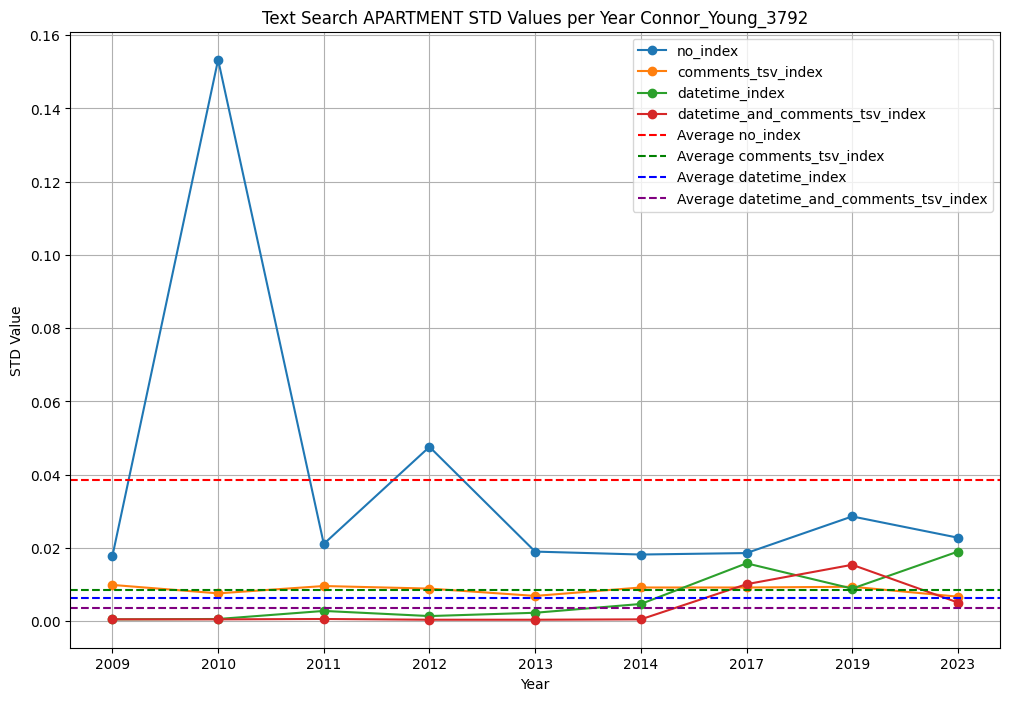

In [99]:
apartment_std_values = text_search_extract_value(data_text_search, 'apartment', 'std')
apartment_std_df = pd.DataFrame(apartment_std_values).T
apartment_std_df.rename(columns = {"__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__comments_tsv_in_reviews__": "comments_tsv_index",
    "__datetime_in_reviews__comments_tsv_in_reviews__": "datetime_and_comments_tsv_index"}
    , inplace = True)

plt.figure(figsize=(12, 8))

# plot each index data
for col in apartment_std_df.columns:
    plt.plot(apartment_std_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

# calcualte and plot average lines for ech index across all years
for i, col in enumerate(apartment_std_df.columns):
    avg = apartment_std_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Text Search APARTMENT STD Values per Year Connor_Young_3792')
plt.xlabel('Year')
plt.ylabel('STD Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# update_datetimes_query.json

In [100]:
data_update_datetimes = util.fetch_perf_data('update_datetimes_query.json')

In [101]:
renamed_data_update_datetimes = rename_keys(data_update_datetimes)

In [102]:
axis_order = ['New Springville', 'Fort Hamilton', 'Long Island City', 'Bedford-Stuyvesant', 'Staten Island', 'Bronx', 'Queens', 'Manhattan']

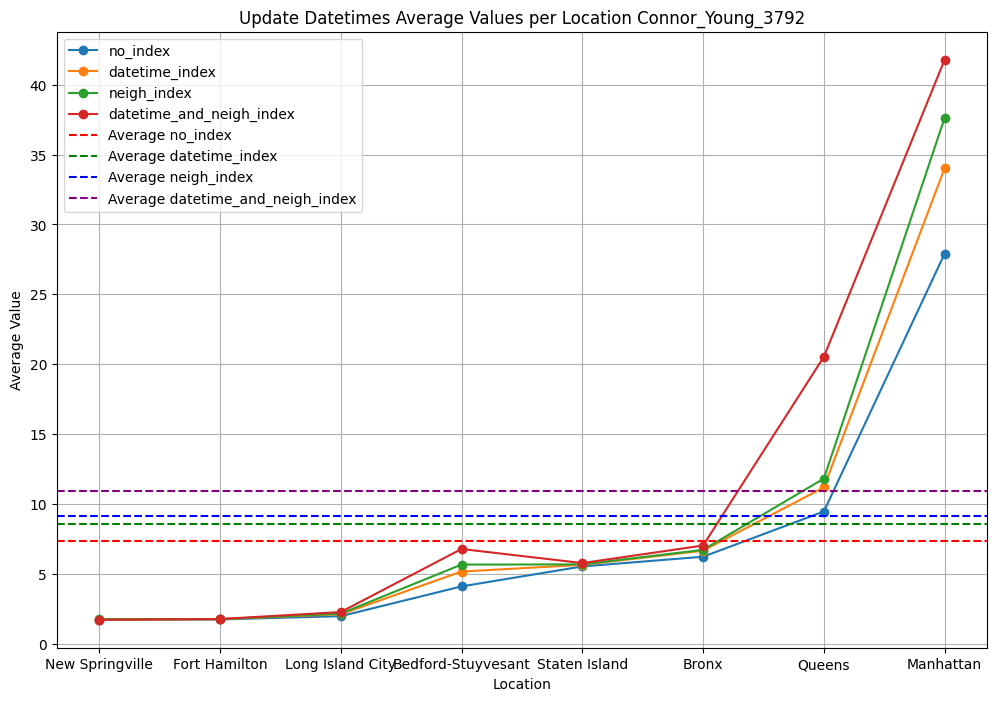

In [103]:
update_datetimes_avg = extract_value(renamed_data_update_datetimes, 'avg')
update_datetimes_avg_df = pd.DataFrame(update_datetimes_avg).T
update_datetimes_avg_df = update_datetimes_avg_df.reindex(axis_order)
update_datetimes_avg_df.rename(columns = {"__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__neigh_in_listings__": "neigh_index",
    "__neigh_in_listings__datetime_in_reviews__": "datetime_and_neigh_index"}
    , inplace = True)

plt.figure(figsize=(12, 8))

# plot each index data
for col in update_datetimes_avg_df.columns:
    plt.plot(update_datetimes_avg_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

# calcualte and plot average lines for ech index across all years
for i, col in enumerate(update_datetimes_avg_df.columns):
    avg = update_datetimes_avg_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Update Datetimes Average Values per Location Connor_Young_3792')
plt.xlabel('Location')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

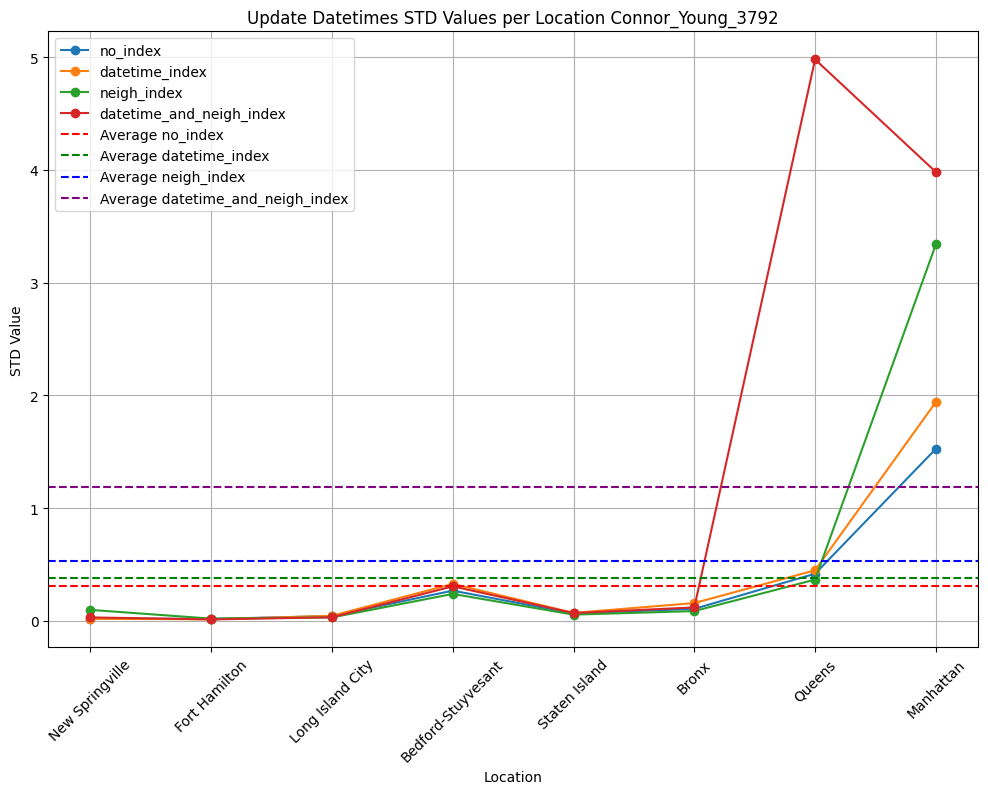

In [104]:
update_datetimes_std = extract_value(renamed_data_update_datetimes, 'std')
update_datetimes_std_df = pd.DataFrame(update_datetimes_std).T
update_datetimes_std_df = update_datetimes_std_df.reindex(axis_order)
update_datetimes_std_df.rename(columns = {"__": "no_index",
    "__datetime_in_reviews__": "datetime_index",
    "__neigh_in_listings__": "neigh_index",
    "__neigh_in_listings__datetime_in_reviews__": "datetime_and_neigh_index"}
    , inplace = True)

plt.figure(figsize=(12, 8))

# plot each index data
for col in update_datetimes_std_df.columns:
    plt.plot(update_datetimes_std_df[col], label=col, marker='o')

colors = ['red', 'green', 'blue', 'purple']

# calcualte and plot average lines for ech index across all years
for i, col in enumerate(update_datetimes_std_df.columns):
    avg = update_datetimes_std_df[col].mean()
    plt.axhline(avg, color=colors[i], linestyle='--', label=f'Average {col}')

plt.title('Update Datetimes STD Values per Location Connor_Young_3792')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.ylabel('STD Value')
plt.legend()
plt.grid(True)
plt.show()